In [74]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
import string
from geopy import distance

In [75]:
x_min, x_max = 30.632819, 30.794497
y_min, y_max = 76.680850, 76.817545
num_patterns = 5
num_type = 4
min_dist = 0.5
point_types = []
injected_patterns = set()

In [76]:
data = pd.DataFrame(columns=['x', 'y', 'type', 'name'])

for i in range(num_type):
    point_types.append(chr(ord('A') + i))
    
while len(injected_patterns) < num_patterns:
    
    # Pick a random point
    x = random.uniform(x_min, x_max)
    y = random.uniform(y_min, y_max)
    
    # Pick a random type for this point
    point_type = random.choice(point_types)
    
    # Determine the name of the point
    name = point_type + str(sum(data['type'] == point_type) + 1)
        
    data = pd.concat([data, pd.DataFrame({'x': [x], 'y': [y], 'type': [point_type], 'name': [name]})], ignore_index=True)

    # Pick a random size of pattern (between 2 and num_type)
    pattern_size = random.randint(2, num_type+1)
#     pattern_size = num_type
    # Initialize the pattern string with the first point's type
    pattern_str = point_type
    
    # Initialize a list of point types used in the pattern
    pattern_types = [point_type]
    
    # Run a loop to select random points which are 'distance' apart from this point (loop will run 'pattern size' times)
    for j in range(pattern_size - 1):
        # Generate a random point
        theta = random.uniform(0, 2 * math.pi)
        
        distance = np.random.uniform(0, min_dist)
        
        x_new = x + (distance / 111.32) * math.cos(theta)
        y_new = y + (distance / (111.32 * math.cos(math.radians(x_new)))) * math.sin(theta)
        
        # Pick a random type for this point, making sure it is different from the previous types
        point_type = random.choice([t for t in point_types if t != pattern_types[-1]])
        
        # Determine the name of the point
        name = point_type + str(sum(data['type'] == point_type) + 1)
        
        # Add the point's type and name to the pattern string and pattern_types list
        pattern_str += point_type
        pattern_types.append(point_type)
        
        # Add the point to the data list
        data = pd.concat([data, pd.DataFrame({'x': [x_new], 'y': [y_new], 'type': [point_type], 'name': [name]})], ignore_index=True)

    # Add the pattern string to the injected_patterns list if all the point types in the pattern are different
    if len(set(pattern_types)) == pattern_size:
        injected_patterns.add(''.join(sorted(pattern_str)))
        

In [77]:
point_types

['A', 'B', 'C', 'D']

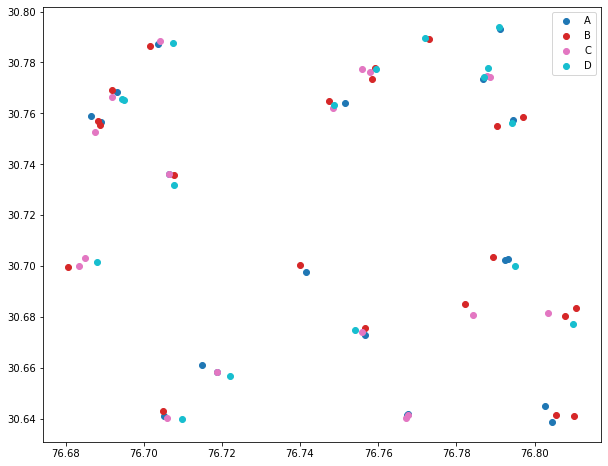

In [81]:
cmap = plt.get_cmap('tab10')
colors = cmap(np.linspace(0, 1, num_type))

fig, ax = plt.subplots(figsize=(10, 8))

for i, t in enumerate(point_types):
    points = data[data['type'] == t]
    ax.scatter(points['y'], points['x'], color=colors[i], label=t)

ax.legend()
# plt.xlim(y_min, y_max)
# plt.ylim(x_min, x_max)
plt.show()

In [79]:
injected_patterns = list(set([''.join(sorted(pattern)) for pattern in injected_patterns]))

print(injected_patterns)

['BD', 'ABCD', 'AD', 'AB', 'BC']


In [80]:
data = data.sort_values('type')

file = open("new_data.txt", "w")

for typ in point_types:
    
    type_i = data[data['type']==typ]   
    
    file.write(str(len(type_i)) + '\n')
    
    for index, row in type_i.iterrows():
        file.write(str(row['y']) + ' ' + str(row['x']) + '\n')
        
file.close()

In [85]:
data = data.sort_values('type')

file = open("known_data_somu.txt", "w")

for typ in point_types:
    
    type_i = data[data['type']==typ]   
        
    for index, row in type_i.iterrows():
        file.write(str(row['name']) +','+ str(row['y']) + ',' + str(row['x']) + '\n')
        
file.close()

In [88]:
data = data.sort_values('type')

file = open("known_data_sk.txt", "w")

for typ in point_types:
    
    type_i = data[data['type']==typ]   
        
    for index, row in type_i.iterrows():
        file.write(typ + ' ' + str(row['name']) +','+ str(row['y']) + ',' + str(row['x']) + '\n')
        
file.close()

In [86]:
def show_rect(data, num_type, x1, y1, x2, y2):
    cmap = plt.get_cmap('tab10')
    colors = cmap(np.linspace(0, 1, num_type))
    fig, ax = plt.subplots(figsize=(10, 8))
    for i, t in enumerate(point_types):
        points = data[data['type'] == t]
        ax.scatter(points['y'], points['x'], color=colors[i], label=t)

    rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    plt.legend()
    plt.show()

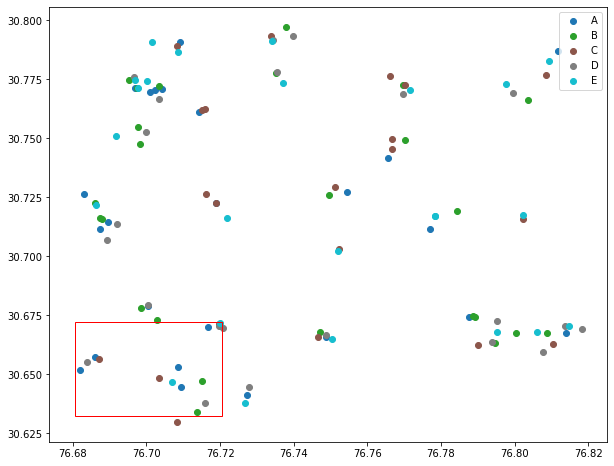

In [87]:
show_rect(data, num_type, 76.68049880779033, 30.632186937700684, 76.72049880779034, 30.672186937700683)